# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

## Get the Data
**Reading in the advertising.csv file and setting it to a data frame.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Checking the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Looking a the info the data offers**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Exploring the data to look for some strightforward insights 



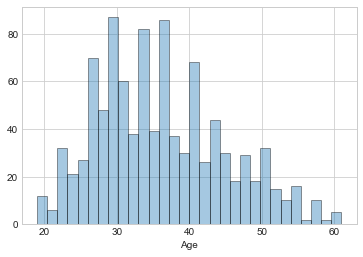

In [5]:
sns.distplot(ad_data['Age'], bins=30, kde=False)

The age of the study seems to be around the range of 25-40 years

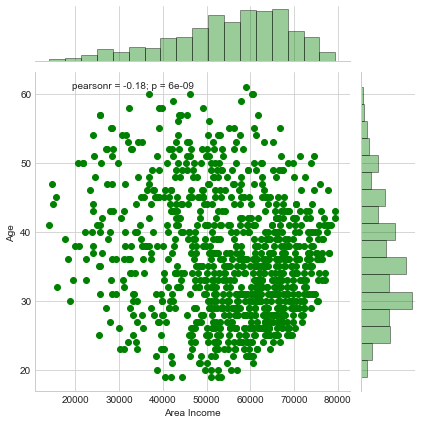

In [6]:
sns.jointplot(x='Area Income', y='Age', data = ad_data, color='green')

It seems like the younger population stays in areas of high average income, while the older section of the group is quite well distributed geographically 

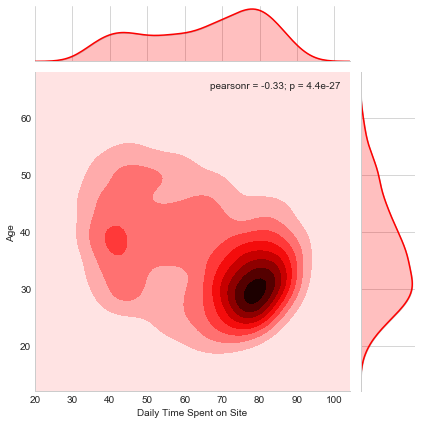

In [7]:
sns.jointplot(x='Daily Time Spent on Site', y = 'Age', data = ad_data, kind='kde', color='red')

A similar analysis can show that the youth spend more time on the specific site than the older population. This might be due to the fact that they spend more time in general on the internet.

** Finally, creating a pariplot shows us all the relations we want to look at once.** 

The hue here is based on the *Clicked on Ad* column. It helps visualize the 2 groups better, the ones that clicked on the ad and the others that didn't.

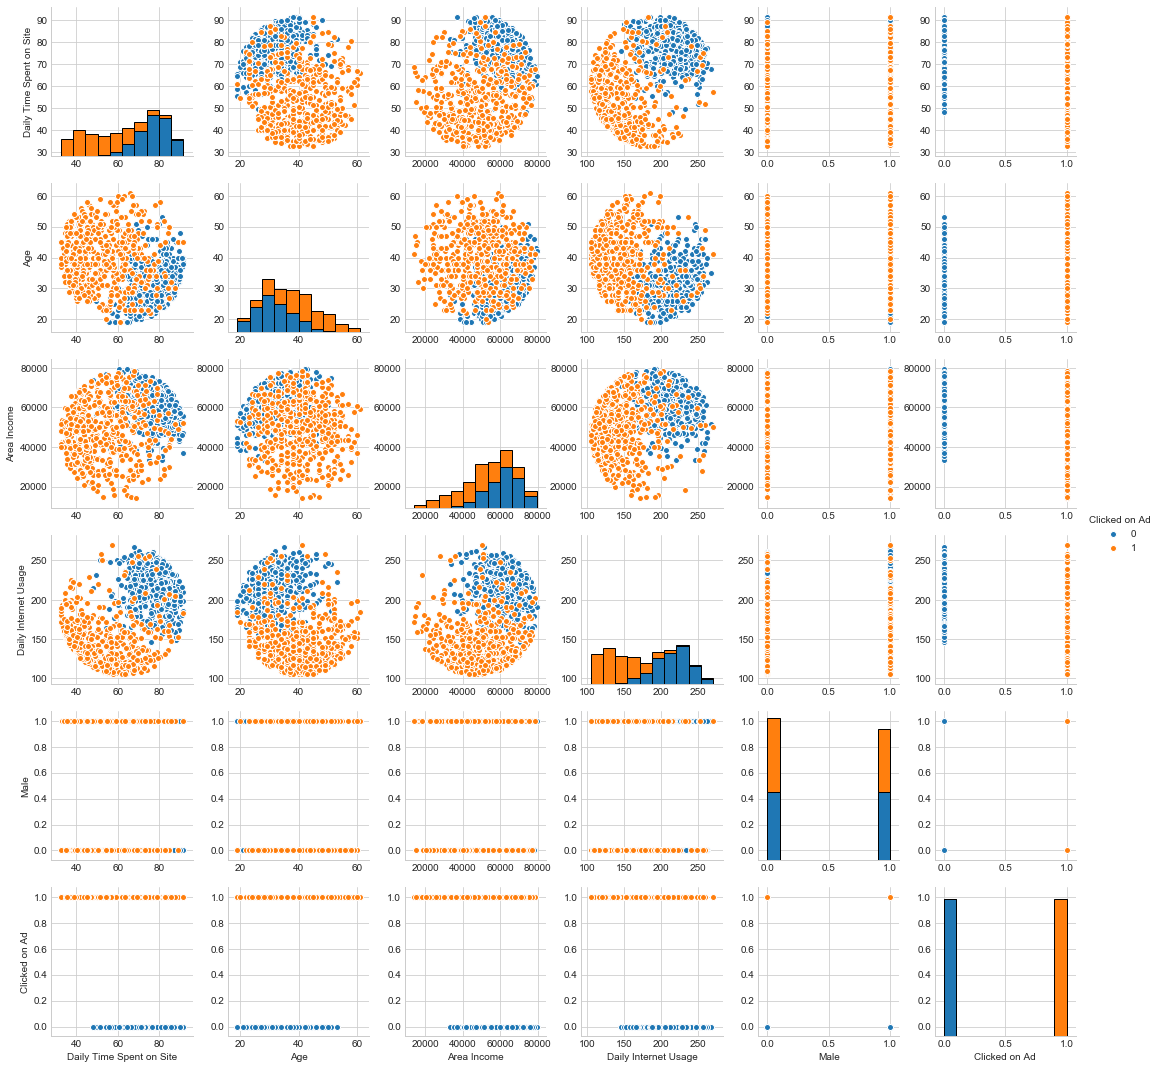

In [8]:
sns.pairplot(ad_data, hue='Clicked on Ad')

It looks like the younger section spends more time on the internet and so they come across such ads on a daily basis, and hence choose to ignore most such ads. Or they might be using Ad blocking softwares!

# Logistic Regression

Now it's time to do a train test split, and train our model

On looking more into the numerical series in the dataset, we see that the important columns are the ones with numerical values in it. So we can go ahead and only choose those columns. 

** First the data is split into the training and testing sets**

In [9]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Then fit a logistic regression model on the training set.**

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel=LogisticRegression()

In [13]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations

** Using the generated model to predict the test data.**

In [14]:
prediction = logmodel.predict(X_test)

** Creating a confusion matrix for the model.**

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
table=confusion_matrix(y_test, prediction)
print(table)

[[149   8]
 [ 15 128]]


It looks like the model did a great job as most of the data fall under the true positive and true negative category. While there are only 8 **type-I errors** and 15 **type-II errors** 

In [17]:
total = table.sum()
accurate = table[0,0]+table[1,1]
miscalc = table[0,1]+table[1,0]

In [18]:
print('Accuracy:',round((accurate/total*100),2),'%\n' 
      'Miscalculation:',round((miscalc/total*100),2),'%')

Accuracy: 92.33 %
Miscalculation: 7.67 %


**Since the predictive model show s a high level of accuracy and a low error percent, we can safely assume that the model is a good predictor of the value of interest, *Click on Ad* column.**